**Import the libraries**

In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

**Load the dataset**

In [169]:
df=pd.read_csv("/content/loan_data_final.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,all_other,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,all_other,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


**Shape of the dataset in the form of columns and rows**

In [170]:
df.shape

(9578, 14)

**Converting the column name in proper format**

In [171]:
df.rename(columns = {'credit.policy':'credit_policy'}, inplace = True)
df.rename(columns = {'int.rate':'int_rate'}, inplace = True)
df.rename(columns = {'log.annual.inc':'log_annual_inc'}, inplace = True)
df.rename(columns = {'days.with.cr.line':'days_with_cr_line'}, inplace = True)
df.rename(columns = {'revol.bal':'revol_bal'}, inplace = True)
df.rename(columns = {'revol.util':'revol_util'}, inplace = True)
df.rename(columns = {'inq.last.6mths':'inq_last_6mths'}, inplace = True)
df.rename(columns = {'delinq.2yrs':'delinq_2yrs'}, inplace = True)
df.rename(columns = {'pub.rec':'pub_rec'}, inplace = True)
df.rename(columns = {'not.fully.paid':'not_fully_paid'}, inplace = True)
df.head(5)

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,all_other,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,all_other,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


**Chacking for the datatype**

In [172]:
df.dtypes

credit_policy          int64
purpose               object
int_rate             float64
installment          float64
log_annual_inc       float64
dti                  float64
fico                   int64
days_with_cr_line    float64
revol_bal              int64
revol_util           float64
inq_last_6mths         int64
delinq_2yrs            int64
pub_rec                int64
not_fully_paid         int64
dtype: object

#####Data types of columns are in proper format.

**Descriptive analysis of data**

In [281]:
df.describe()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,loan,purpose_all_other,purpose_debt_consolidation,purpose_educational,purpose_small_business
count,9578.0,9578.000000,9578.00000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.0,9578.0,9578.0,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,1.0,0.122597,318.33168,10.931566,12.606679,710.844226,4490.434820,12696.118501,46.799236,1.409689,0.0,0.0,0.0,0.627166,0.486427,0.413134,0.035811,0.064627
std,0.0,0.026720,205.08094,0.583079,6.883970,37.964441,2286.122357,12253.923032,29.014417,1.557783,0.0,0.0,0.0,0.483584,0.499842,0.492422,0.185829,0.245880
min,1.0,0.060000,15.67000,9.459094,0.000000,612.000000,178.958333,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.103900,163.77000,10.558414,7.212500,682.000000,2820.000000,3187.000000,22.600000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.122100,268.95000,10.928884,12.665000,707.000000,4139.958333,8596.000000,46.300000,1.000000,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,0.140700,432.76250,11.291293,17.950000,737.000000,5730.000000,18249.500000,70.900000,2.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.0,0.195900,836.25125,12.390612,29.960000,819.500000,10095.000000,40843.250000,119.000000,5.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


**Checking for the null values**

In [173]:
df.isnull().sum()

credit_policy        0
purpose              0
int_rate             0
installment          0
log_annual_inc       0
dti                  0
fico                 0
days_with_cr_line    0
revol_bal            0
revol_util           0
inq_last_6mths       0
delinq_2yrs          0
pub_rec              0
not_fully_paid       0
dtype: int64

##### There is no null value present in dataset.

**Checking the data is it in proper format or not.**

In [174]:
df.columns

Index(['credit_policy', 'purpose', 'int_rate', 'installment', 'log_annual_inc',
       'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths', 'delinq_2yrs', 'pub_rec', 'not_fully_paid'],
      dtype='object')

In [175]:
df["purpose"].value_counts()

all_other             4659
debt_consolidation    3957
small_business         619
educational            343
Name: purpose, dtype: int64

#####Data is in the proper format.

**Droping the duplicates from dataset**

In [176]:
df = df.drop_duplicates()

In [177]:
df.shape

(9578, 14)

**Checking for the outliers**

In [178]:
df.columns

Index(['credit_policy', 'purpose', 'int_rate', 'installment', 'log_annual_inc',
       'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths', 'delinq_2yrs', 'pub_rec', 'not_fully_paid'],
      dtype='object')

**Remove the outliers from credit_policy**

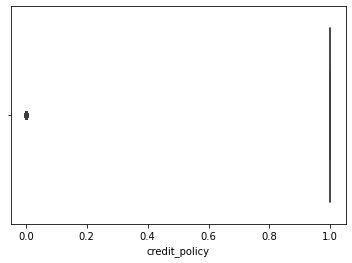

In [179]:
sns.boxplot(df["credit_policy"])

**Find outliers using IQR**

In [180]:
percentile25 = df['credit_policy'].quantile(0.25)
percentile75 = df['credit_policy'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  1.0
75th percentile of the data is  1.0
IQR : 0.0


**Setup the max and min level**

In [181]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

1.0
1.0


In [182]:
df['credit_policy'] = np.where(
    df['credit_policy']>max_value,
    max_value,
    np.where(
        df['credit_policy']<min_value,
        min_value,
        df['credit_policy']
    ) 
)
df['credit_policy'].describe()

count    9578.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: credit_policy, dtype: float64

**After removing outliers credit_policy**

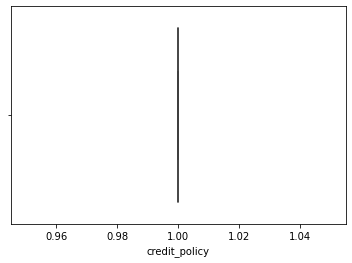

In [183]:
sns.boxplot(df["credit_policy"])

**Remove outliers from int_rate**

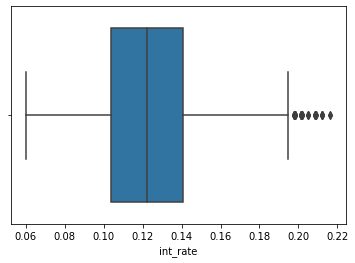

In [184]:
sns.boxplot(df["int_rate"])

**Remove outliers using IQR method**

In [185]:
percentile25 = df['int_rate'].quantile(0.25)
percentile75 = df['int_rate'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  0.1039
75th percentile of the data is  0.1407
IQR : 0.036799999999999986


**Setup the max and min level**

In [186]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

0.19589999999999996
0.04870000000000003


In [187]:
df['int_rate'] = np.where(
    df['int_rate']>max_value,
    max_value,
    np.where(
        df['int_rate']<min_value,
        min_value,
        df['int_rate']
    ) 
)
df['int_rate'].describe()

count    9578.000000
mean        0.122597
std         0.026720
min         0.060000
25%         0.103900
50%         0.122100
75%         0.140700
max         0.195900
Name: int_rate, dtype: float64

**After removing outliers**

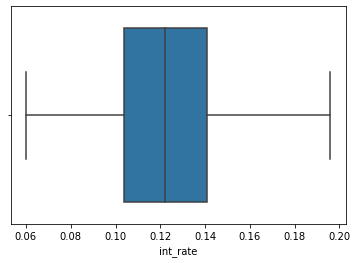

In [188]:
sns.boxplot(df["int_rate"])

**Remove outliers from installment**

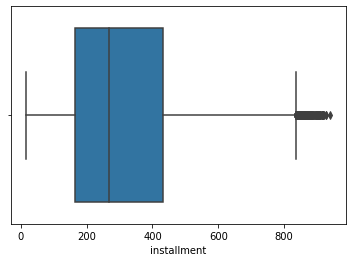

In [189]:
sns.boxplot(df["installment"])

**Remove outliers using IQR technique**

In [190]:
percentile25 = df['installment'].quantile(0.25)
percentile75 = df['installment'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  163.77
75th percentile of the data is  432.7625
IQR : 268.99249999999995


**Setup the max and min value**

In [191]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

836.2512499999999
-239.71874999999991


In [192]:
df['installment'] = np.where(
    df['installment']>max_value,
    max_value,
    np.where(
        df['installment']<min_value,
        min_value,
        df['installment']
    ) 
)
df['installment'].describe()

count    9578.00000
mean      318.33168
std       205.08094
min        15.67000
25%       163.77000
50%       268.95000
75%       432.76250
max       836.25125
Name: installment, dtype: float64

**After removing outliers from installment**

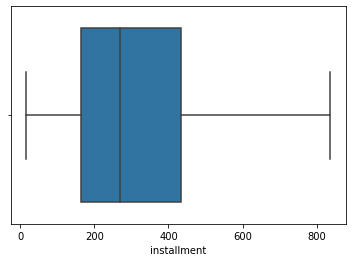

In [193]:
sns.boxplot(df["installment"])

**Remove outliers from log_annual_inc**

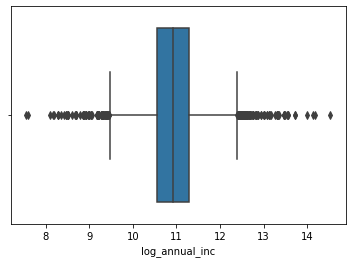

In [194]:
sns.boxplot(df["log_annual_inc"])

**Remove outliers using IQR technique**

In [195]:
percentile25 = df['log_annual_inc'].quantile(0.25)
percentile75 = df['log_annual_inc'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  10.55841352
75th percentile of the data is  11.2912929175
IQR : 0.7328793974999996


In [196]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

12.39061201375
9.45909442375


In [197]:
df['log_annual_inc'] = np.where(
    df['log_annual_inc']>max_value,
    max_value,
    np.where(
        df['log_annual_inc']<min_value,
        min_value,
        df['log_annual_inc']
    ) 
)
df['log_annual_inc'].describe()

count    9578.000000
mean       10.931566
std         0.583079
min         9.459094
25%        10.558414
50%        10.928884
75%        11.291293
max        12.390612
Name: log_annual_inc, dtype: float64

**After removing outliers**

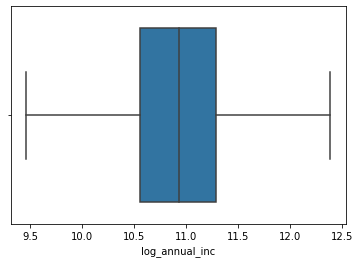

In [198]:
sns.boxplot(df["log_annual_inc"])

**Remove outliers from fico**

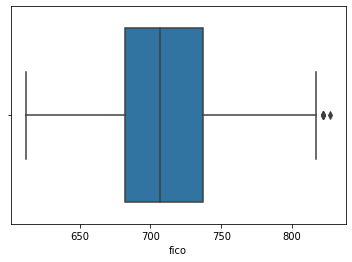

In [199]:
sns.boxplot(df["fico"])

**Remove outliers using IQR technique**

In [200]:
percentile25 = df['fico'].quantile(0.25)
percentile75 = df['fico'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  682.0
75th percentile of the data is  737.0
IQR : 55.0


**Setup max and min value**

In [201]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

819.5
599.5


In [202]:
df['fico'] = np.where(
    df['fico']>max_value,
    max_value,
    np.where(
        df['fico']<min_value,
        min_value,
        df['fico']
    ) 
)
df['fico'].describe()

count    9578.000000
mean      710.844226
std        37.964441
min       612.000000
25%       682.000000
50%       707.000000
75%       737.000000
max       819.500000
Name: fico, dtype: float64

**After removing outliers from fico**

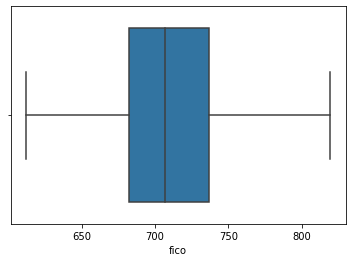

In [203]:
sns.boxplot(df["fico"])

**Remove outliers from days_with_cr_line**

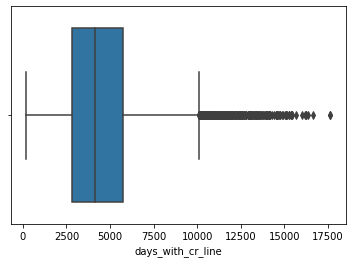

In [204]:
sns.boxplot(df["days_with_cr_line"])

**Removing outliers using IQR technique**

In [205]:
percentile25 = df['days_with_cr_line'].quantile(0.25)
percentile75 = df['days_with_cr_line'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  2820.0
75th percentile of the data is  5730.0
IQR : 2910.0


**Setup the limits min and max**

In [206]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

10095.0
-1545.0


In [207]:
df['days_with_cr_line'] = np.where(
    df['days_with_cr_line']>max_value,
    max_value,
    np.where(
        df['days_with_cr_line']<min_value,
        min_value,
        df['days_with_cr_line']
    ) 
)
df['days_with_cr_line'].describe()

count     9578.000000
mean      4490.434820
std       2286.122357
min        178.958333
25%       2820.000000
50%       4139.958333
75%       5730.000000
max      10095.000000
Name: days_with_cr_line, dtype: float64

**After removing outliers from days_with_cr_line**

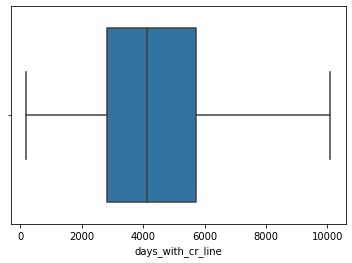

In [208]:
sns.boxplot(df["days_with_cr_line"])

**Remove outliers from revol_bal**

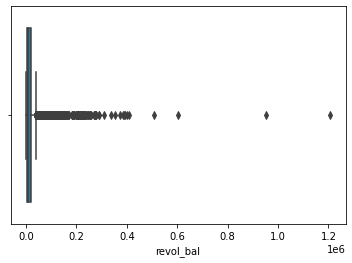

In [209]:
sns.boxplot(df["revol_bal"])

**Remove outliers using IQR technique**

In [210]:
percentile25 = df['revol_bal'].quantile(0.25)
percentile75 = df['revol_bal'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  3187.0
75th percentile of the data is  18249.5
IQR : 15062.5


**Setup the limits max and min value**

In [211]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

40843.25
-19406.75


In [212]:
df['revol_bal'] = np.where(
    df['revol_bal']>max_value,
    max_value,
    np.where(
        df['revol_bal']<min_value,
        min_value,
        df['revol_bal']
    ) 
)
df['revol_bal'].describe()

count     9578.000000
mean     12696.118501
std      12253.923032
min          0.000000
25%       3187.000000
50%       8596.000000
75%      18249.500000
max      40843.250000
Name: revol_bal, dtype: float64

**After removing outliers from revol_bal**

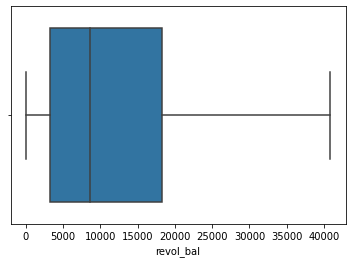

In [213]:
sns.boxplot(df["revol_bal"])

**Remove outliers from inq_last_6mths**

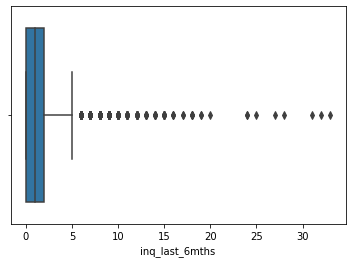

In [214]:
sns.boxplot(df["inq_last_6mths"])

**Remove outliers from inq_last_6mths using IQR technique**

In [215]:
percentile25 = df['inq_last_6mths'].quantile(0.25)
percentile75 = df['inq_last_6mths'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  0.0
75th percentile of the data is  2.0
IQR : 2.0


**Setup the limits max and min value**

In [216]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

5.0
-3.0


In [217]:
df['inq_last_6mths'] = np.where(
    df['inq_last_6mths']>max_value,
    max_value,
    np.where(
        df['inq_last_6mths']<min_value,
        min_value,
        df['inq_last_6mths']
    ) 
)
df['inq_last_6mths'].describe()

count    9578.000000
mean        1.409689
std         1.557783
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: inq_last_6mths, dtype: float64

**After removing outliers from inq_last_6mths**

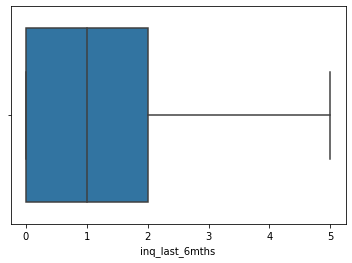

In [218]:
sns.boxplot(df["inq_last_6mths"])

**Remove outliers from delinq_2yrs**

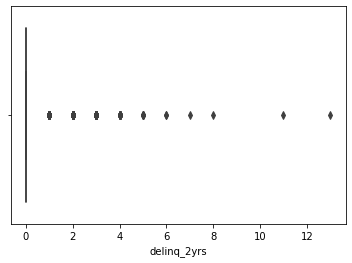

In [219]:
sns.boxplot(df["delinq_2yrs"])

**Use IQR to remove outliers**

In [220]:
percentile25 = df['delinq_2yrs'].quantile(0.25)
percentile75 = df['delinq_2yrs'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  0.0
75th percentile of the data is  0.0
IQR : 0.0


**Find the maximum and minimum value**

In [221]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

0.0
0.0


In [222]:
df['delinq_2yrs'] = np.where(
    df['delinq_2yrs']>max_value,
    max_value,
    np.where(
        df['delinq_2yrs']<min_value,
        min_value,
        df['delinq_2yrs']
    ) 
)
df['delinq_2yrs'].describe()

count    9578.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: delinq_2yrs, dtype: float64

**After removing outliers from delinq_2yrs**

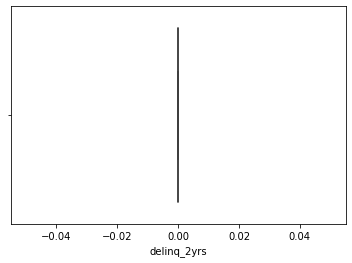

In [223]:
sns.boxplot(df["delinq_2yrs"])

**Remove outliers from pub_rec**

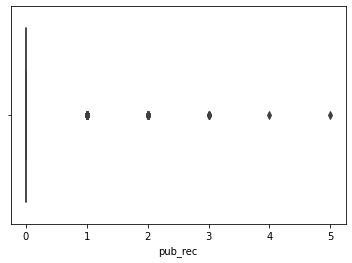

In [224]:
sns.boxplot(df["pub_rec"])

**Find IQR to remove the outliers**

In [225]:
percentile25 = df['pub_rec'].quantile(0.25)
percentile75 = df['pub_rec'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  0.0
75th percentile of the data is  0.0
IQR : 0.0


**Setup the max and min level**

In [226]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

0.0
0.0


In [227]:
df['pub_rec'] = np.where(
    df['pub_rec']>max_value,
    max_value,
    np.where(
        df['pub_rec']<min_value,
        min_value,
        df['pub_rec']
    ) 
)
df['pub_rec'].describe()

count    9578.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: pub_rec, dtype: float64

**After removing outliers from "pub_rec"**

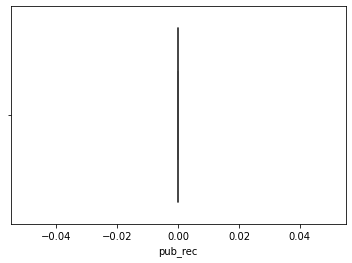

In [228]:
sns.boxplot(df["pub_rec"])

**Remove the outliers from not_fully_paid**

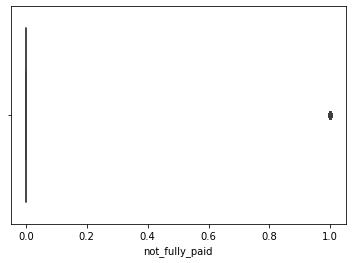

In [229]:
sns.boxplot(df["not_fully_paid"])

**Using IQR to remove outliers**

In [230]:
percentile25 = df['not_fully_paid'].quantile(0.25)
percentile75 = df['not_fully_paid'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  0.0
75th percentile of the data is  0.0
IQR : 0.0


**Maximum and minimum value**

In [231]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

0.0
0.0


In [232]:
df['not_fully_paid'] = np.where(
    df['not_fully_paid']>max_value,
    max_value,
    np.where(
        df['not_fully_paid']<min_value,
        min_value,
        df['not_fully_paid']
    ) 
)
df['not_fully_paid'].describe()

count    9578.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: not_fully_paid, dtype: float64

**After removing outliers**

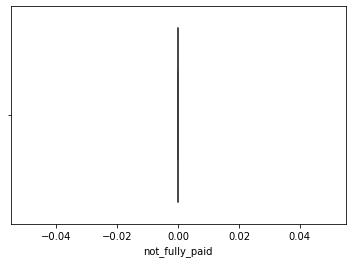

In [233]:
sns.boxplot(df["not_fully_paid"])

**Added one more column "loan" based on fico score**

In [234]:
def categorise(row):  
    if row['fico'] > 670 and row['fico'] <= 739:
        return 'yes'
    return 'no'

#####Good fico score lies between 670 to 739 so, we selected that range to know whether to give loan or not.

In [235]:
df['loan'] = df.apply(lambda row: categorise(row), axis=1)
df.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,loan
0,1.0,debt_consolidation,0.1189,829.10,11.350407,19.48,737.0,5639.958333,28854.0,52.1,0.0,0.0,0.0,0.0,yes
1,1.0,all_other,0.1071,228.22,11.082143,14.29,707.0,2760.000000,33623.0,76.7,0.0,0.0,0.0,0.0,yes
2,1.0,debt_consolidation,0.1357,366.86,10.373491,11.63,682.0,4710.000000,3511.0,25.6,1.0,0.0,0.0,0.0,yes
3,1.0,debt_consolidation,0.1008,162.34,11.350407,8.10,712.0,2699.958333,33667.0,73.2,1.0,0.0,0.0,0.0,yes
4,1.0,all_other,0.1426,102.92,11.299732,14.97,667.0,4066.000000,4740.0,39.5,0.0,0.0,0.0,0.0,no


In [236]:
df["loan"].value_counts()

yes    6007
no     3571
Name: loan, dtype: int64

**Creating "rating" column based on fico score** 

In [237]:
def rate(row):  
    if row['fico'] > 300 and row['fico'] <= 579:
        return '1'
    elif row['fico'] > 580 and row['fico'] <= 669:
        return '2'
    elif row['fico'] > 670  and row['fico'] <= 739:
        return '3'
    elif row['fico'] > 740  and row['fico'] <= 799:
        return '4'  
    elif row['fico'] > 800 and row['fico'] <= 850:
        return '5'
    return '0'

In [238]:
df['credit_rating'] = df.apply(lambda row: rate(row), axis=1)
df.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,loan,credit_rating
0,1.0,debt_consolidation,0.1189,829.10,11.350407,19.48,737.0,5639.958333,28854.0,52.1,0.0,0.0,0.0,0.0,yes,3
1,1.0,all_other,0.1071,228.22,11.082143,14.29,707.0,2760.000000,33623.0,76.7,0.0,0.0,0.0,0.0,yes,3
2,1.0,debt_consolidation,0.1357,366.86,10.373491,11.63,682.0,4710.000000,3511.0,25.6,1.0,0.0,0.0,0.0,yes,3
3,1.0,debt_consolidation,0.1008,162.34,11.350407,8.10,712.0,2699.958333,33667.0,73.2,1.0,0.0,0.0,0.0,yes,3
4,1.0,all_other,0.1426,102.92,11.299732,14.97,667.0,4066.000000,4740.0,39.5,0.0,0.0,0.0,0.0,no,2


In [239]:
df["credit_rating"].value_counts()

3    6007
4    2085
2    1341
5     145
Name: credit_rating, dtype: int64

#####***As we can see in above part we created the "rating" column by dividing figo score in various part.***

####**Exploratory Data Analysis**

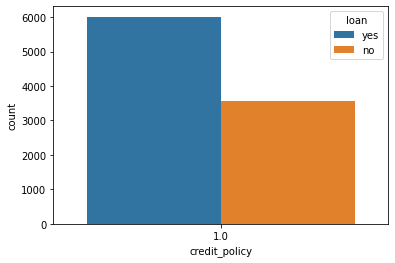

In [240]:
sns.countplot(x='credit_policy', hue='loan', data=df)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

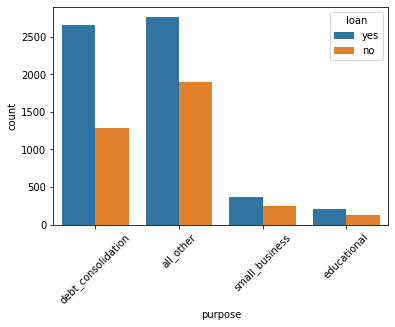

In [241]:
sns.countplot(x='purpose', hue='loan', data=df)
plt.xticks(rotation=45)

1.   As we can see in above plot we can give loan to debt_consolidation and all_other.
2.   There is some risk to give loan to small_business and education. 



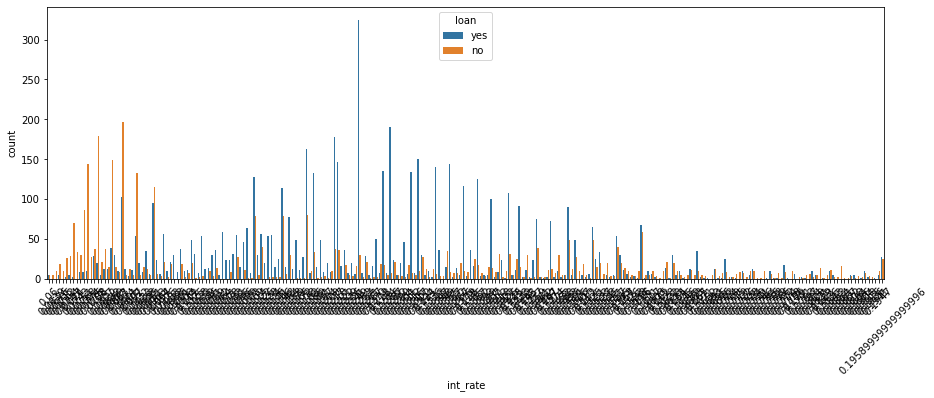

In [242]:
fig, axes=plt.subplots(ncols=1,figsize=(15,5))
sns.countplot(x='int_rate', hue='loan', data=df)
plt.xticks(rotation=45)
plt.show()

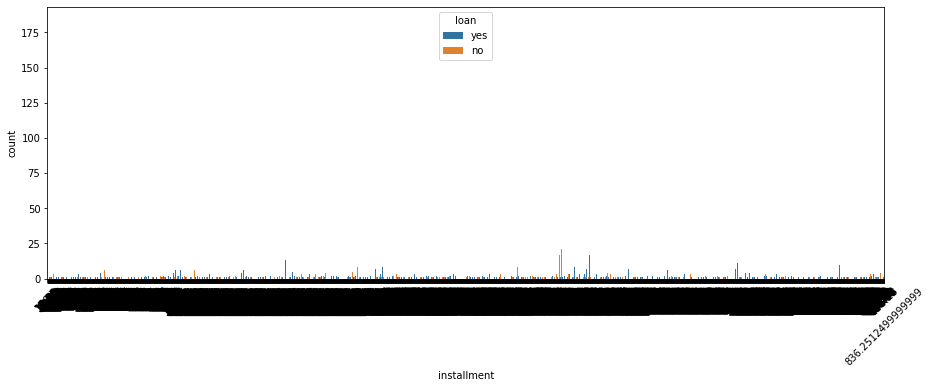

In [243]:
fig, axes=plt.subplots(ncols=1,figsize=(15,5))
sns.countplot(x='installment', hue='loan', data=df)
plt.xticks(rotation=45)
plt.show()

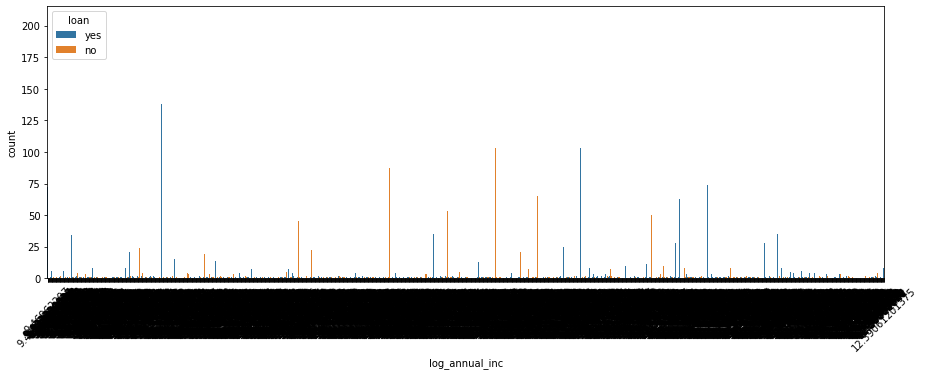

In [244]:
fig, axes=plt.subplots(ncols=1,figsize=(15,5))
sns.countplot(x='log_annual_inc', hue='loan', data=df)
plt.xticks(rotation=45)
plt.show()

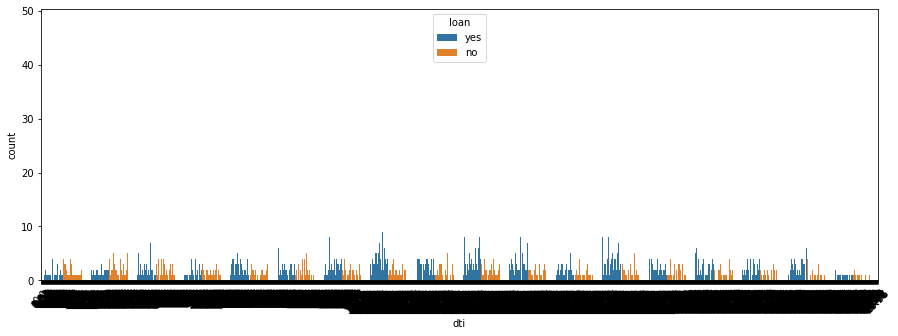

In [245]:
fig, axes=plt.subplots(ncols=1,figsize=(15,5))
sns.countplot(x='dti', hue='loan', data=df)
plt.xticks(rotation=45)
plt.show()

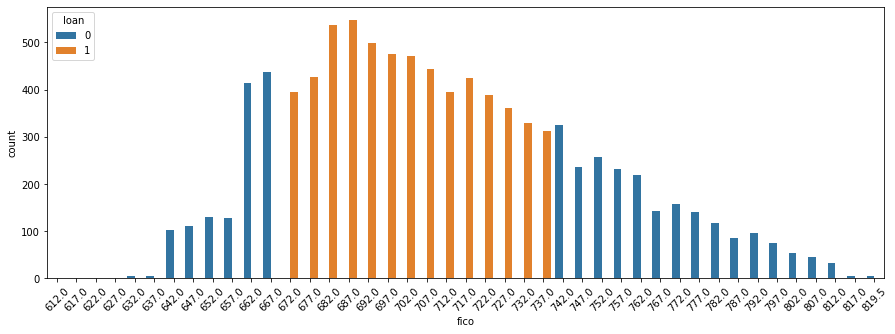

In [284]:
fig, axes=plt.subplots(ncols=1,figsize=(15,5))
sns.countplot(x='fico', hue='loan', data=df)
plt.xticks(rotation=45)
plt.show()

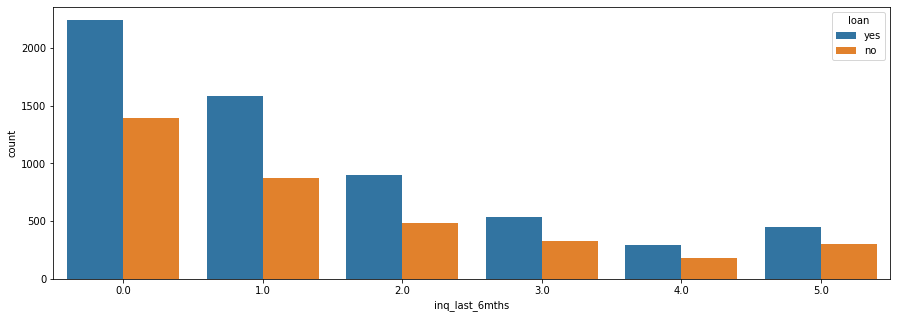

In [247]:
fig, axes=plt.subplots(ncols=1,figsize=(15,5))
sns.countplot(x='inq_last_6mths', hue='loan', data=df)
plt.show()

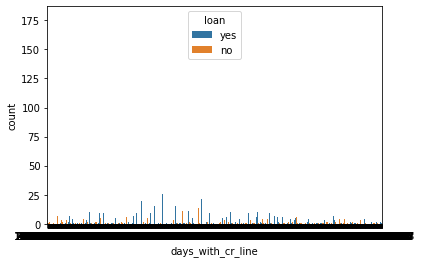

In [248]:
sns.countplot(data=df, x='days_with_cr_line',hue='loan')

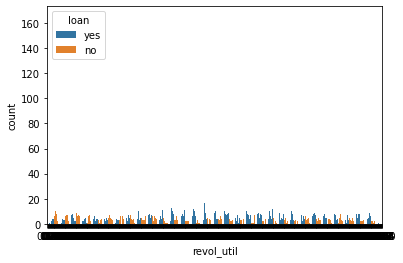

In [249]:
sns.countplot(data=df, x='revol_util',hue='loan')

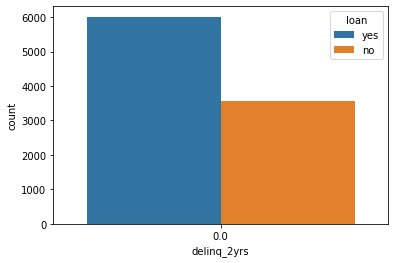

In [251]:
sns.countplot(data=df, x='delinq_2yrs',hue='loan')

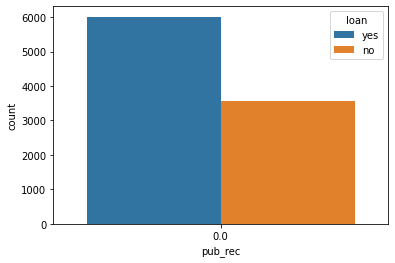

In [252]:
sns.countplot(data=df, x='pub_rec',hue='loan')

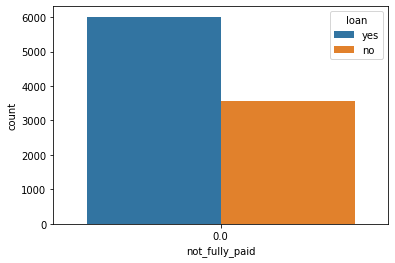

In [253]:
sns.countplot(data=df, x='not_fully_paid',hue='loan')

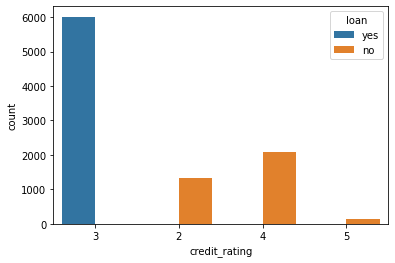

In [254]:
sns.countplot(data=df, x='credit_rating',hue='loan')

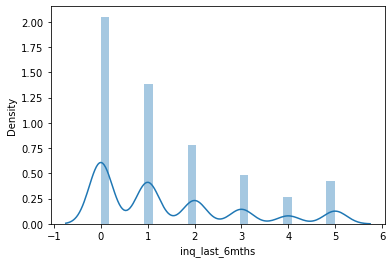

In [255]:
sns.distplot(df['inq_last_6mths'])

**Encode the data**

In [256]:
df.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,loan,credit_rating
0,1.0,debt_consolidation,0.1189,829.10,11.350407,19.48,737.0,5639.958333,28854.0,52.1,0.0,0.0,0.0,0.0,yes,3
1,1.0,all_other,0.1071,228.22,11.082143,14.29,707.0,2760.000000,33623.0,76.7,0.0,0.0,0.0,0.0,yes,3
2,1.0,debt_consolidation,0.1357,366.86,10.373491,11.63,682.0,4710.000000,3511.0,25.6,1.0,0.0,0.0,0.0,yes,3
3,1.0,debt_consolidation,0.1008,162.34,11.350407,8.10,712.0,2699.958333,33667.0,73.2,1.0,0.0,0.0,0.0,yes,3
4,1.0,all_other,0.1426,102.92,11.299732,14.97,667.0,4066.000000,4740.0,39.5,0.0,0.0,0.0,0.0,no,2


**Apply lable encoding on loan column as it is categorical data**

In [257]:
df.loan = df.loan.map({'no': 0,'yes': 1})

**Apply One-Hot Encoding for Nominal Categories**

In [258]:
df=pd.get_dummies(df, columns=['purpose'])

**Data after encoding**

In [259]:
df.head()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,loan,credit_rating,purpose_all_other,purpose_debt_consolidation,purpose_educational,purpose_small_business
0,1.0,0.1189,829.10,11.350407,19.48,737.0,5639.958333,28854.0,52.1,0.0,0.0,0.0,0.0,1,3,0,1,0,0
1,1.0,0.1071,228.22,11.082143,14.29,707.0,2760.000000,33623.0,76.7,0.0,0.0,0.0,0.0,1,3,1,0,0,0
2,1.0,0.1357,366.86,10.373491,11.63,682.0,4710.000000,3511.0,25.6,1.0,0.0,0.0,0.0,1,3,0,1,0,0
3,1.0,0.1008,162.34,11.350407,8.10,712.0,2699.958333,33667.0,73.2,1.0,0.0,0.0,0.0,1,3,0,1,0,0
4,1.0,0.1426,102.92,11.299732,14.97,667.0,4066.000000,4740.0,39.5,0.0,0.0,0.0,0.0,0,2,1,0,0,0


In [260]:
df["loan"].value_counts()

1    6007
0    3571
Name: loan, dtype: int64

In [261]:
X = df.drop('loan',axis=1).values
y = df['loan'].values

In [262]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

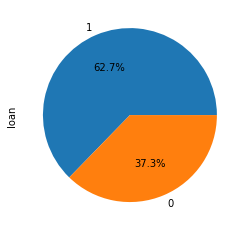

In [263]:
df["loan"].value_counts().plot(kind='pie',autopct='%1.1f%%')

####As we can see data is not balance so we need to balance the data.

###**Balancing the dataset**

In [264]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

Original unbalanced dataset shape 9578
Resampled balanced dataset shape 12014


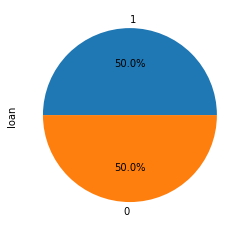

In [265]:
x_smote, y_smote = smote.fit_resample(X,y)
print('Original unbalanced dataset shape', len(df))
print('Resampled balanced dataset shape', len(y_smote))
balanced_df = pd.DataFrame(x_smote, columns=list(i for i in list(df.describe(include='all').columns) if i != 'loan'))
balanced_df['loan'] = y_smote
balanced_df.loan.value_counts().plot(kind='pie',autopct='%1.1f%%')

####Now we can see the data is balanced.

In [266]:
balanced_df.loan.value_counts()

1    6007
0    6007
Name: loan, dtype: int64

###**Logistic Regression**

In [267]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [268]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
lr.score(X_test,y_test)

0.6663883089770355

**Scaling**

In [269]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [270]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train,y_train) # training the model
  print("K value  : " , i, " train score : ", knn.score(X_train,y_train) , " score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=10)))

K value  :  1  train score :  1.0  score :  0.9945701822013706
K value  :  2  train score :  0.9983293888347488  score :  0.9949882032070232
K value  :  3  train score :  0.9987470416260615  score :  0.9945711507393818
K value  :  4  train score :  0.9987470416260615  score :  0.9955458873938966
K value  :  5  train score :  0.9974940832521231  score :  0.9930402795588116
K value  :  6  train score :  0.9979117360434359  score :  0.9949895591602388
K value  :  7  train score :  0.9958234720868718  score :  0.9902559264840909
K value  :  8  train score :  0.9979117360434359  score :  0.9933182499680384
K value  :  9  train score :  0.9948489489071418  score :  0.9890026382975426
K value  :  10  train score :  0.9963803424752888  score :  0.9912298883081967
K value  :  20  train score :  0.9888625922316581  score :  0.9842684244985879
K value  :  50  train score :  0.977168314074899  score :  0.9732704816733238


In [271]:
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9966597077244259

###**Decision Tree Classifier**

In [272]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [273]:
y_pred = dt.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0])

In [274]:
roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])

1.0

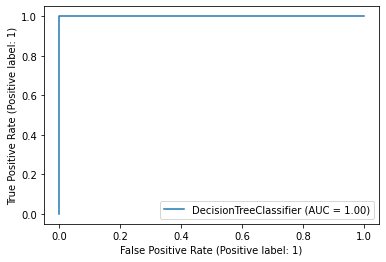

In [275]:
plot_roc_curve(dt, X_test, y_test)

###**Random Forest Classifier**

In [276]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 100, max_depth = 5, max_features='sqrt')
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
acc1 = roc_auc_score(y_test, predictions)
print("Test set auc: {:.2f}".format(acc1))

Test set auc: 1.00


In [277]:
roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

1.0

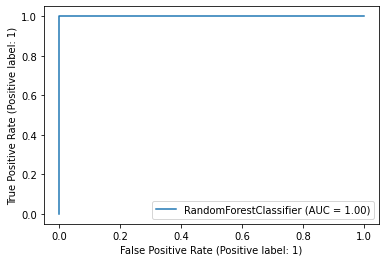

In [278]:
plot_roc_curve(rf, X_test, y_test)

###**XG Boost**

In [279]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train,y_train) #train the model
  model.score(X_test, y_test) 
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  1.0  Cross-Val score :  1.0
Learning rate :  0.02  Train score :  1.0  Cross-Val score :  1.0
Learning rate :  0.03  Train score :  1.0  Cross-Val score :  1.0
Learning rate :  0.04  Train score :  1.0  Cross-Val score :  1.0
Learning rate :  0.05  Train score :  1.0  Cross-Val score :  1.0
Learning rate :  0.06  Train score :  1.0  Cross-Val score :  1.0
Learning rate :  0.07  Train score :  1.0  Cross-Val score :  1.0
Learning rate :  0.08  Train score :  1.0  Cross-Val score :  1.0
Learning rate :  0.09  Train score :  1.0  Cross-Val score :  1.0
Learning rate :  0.1  Train score :  1.0  Cross-Val score :  1.0
Learning rate :  0.11  Train score :  1.0  Cross-Val score :  1.0
Learning rate :  0.12  Train score :  1.0  Cross-Val score :  1.0
Learning rate :  0.13  Train score :  1.0  Cross-Val score :  1.0
Learning rate :  0.14  Train score :  1.0  Cross-Val score :  1.0
Learning rate :  0.15  Train score :  1.0  Cross-Val score :  1.0
Learning ra

In [280]:
model = xgb.XGBClassifier(learning_rate = 0.5, n_estimators=100)
model.fit(X_train,y_train) #train the model
model.score(X_test, y_test)

1.0

##**Conclusion**

**Logistic Regression :- 0.66**

**K Nearest Neighbours :- 0.99**

**Decision Tree :- 1.0**

**Random Forest :- 1.0**

**XG Boost :- 1.0**

#####The best Machine Learning algorithm for this peoblem statement is **Decision Tree, Random Forest, XG Boost** Model

###**Conclusion based on EDA**
1.   From EDA we can conclude that we can give loan to debt_consolidation and all_other.
2.   There is a risk to give loan to small_business and education. 
3.   If the fico score is between 672 to 737 loan will approve.
4.   Best range of fico score is 670 to 739 then we aprove for the loan.
5.   If credit privacy is high we can aprove for the loan.
6.   If the credit rating is good we can aprove for the loan.
7.   Duration and intrest matters for the loan.